<a href="https://colab.research.google.com/github/akheradmand/MachineLearning/blob/main/48/48-2/load_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [ ]:
dataset = load_digits()
# dataset

In [ ]:
X=dataset.data
Y=dataset.target
Y=np.eye(10)[Y]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [ ]:
class Mlp:
    def __init__(self,epochs,η,D_in,H1,H2,D_out):
        self.epochs=epochs
        self.η=η
        self.D_in=D_in
        self.H1=H1
        self.H2=H2
        self.D_out=D_out

        self.W1=np.random.randn(D_in,H1)
        self.W2=np.random.randn(H1,H2)
        self.W3=np.random.randn(H2,D_out)

        self.B1=np.random.randn(1,H1)
        self.B2=np.random.randn(1,H2)
        self.B3=np.random.randn(1,D_out)

    def sigmoid(self,X):
        return 1/(1+np.exp(-X))

    def softmax(self,X):
        return np.exp(X)/np.sum(np.exp(X))

    def root_mean_square_error(self,Y_gt,Y_pred):
        return np.sqrt(np.mean((Y_gt-Y_pred)**2))

    def calculate_accuracy(self,Y,Y_pred):
        return np.sum(np.argmax(Y,axis=1)==np.argmax(Y_pred,axis=1))/len(Y)

    def forward(self,x):
        # layer1
        out1 = self.sigmoid(x.T @ self.W1 + self.B1)

        # layer2
        out2 = self.sigmoid(out1 @ self.W2 + self.B2)

        # layer3
        out3 = self.softmax(out2 @ self.W3 + self.B3)

        return out1,out2,out3

    def backward(self,x,y,y_pred,out1,out2,out3):
        # layer3
        # گرادیان = ارور * مشتق
        error = -2 * (y - y_pred)
        grad_B3 = error
        grad_W3 = out2.T @ error

        # layer2
        error = error @ self.W3.T * out2 *(1 - out2)
        grad_B2 = error
        grad_W2 = out1.T @ error

        # layer1
        error = error @ self.W2.T * out1 * (1 - out1)
        grad_B1 = error
        grad_W1 = x @ error

        return grad_B3,grad_W3,grad_B2,grad_W2,grad_B1,grad_W1

    def update(self,grad_B3,grad_W3,grad_B2,grad_W2,grad_B1,grad_W1):
        # layer1
        self.W1 -= self.η * grad_W1
        self.B1 -= self.η * grad_B1

        # layer2
        self.W2 -= self.η * grad_W2
        self.B2 -= self.η * grad_B2

        # layer3
        self.W3 -= self.η * grad_W3
        self.B3 -= self.η * grad_B3

    def fit(self,X_train,Y_train):
        train_losses=[]
        train_accs=[]
        test_losses=[]
        test_accs=[]
        for epoch in range(self.epochs):
            # train
            Y_pred_train = []
            for x,y in zip(X_train,Y_train):

                x = x.reshape(-1,1)

                out1,out2,out3=self.forward(x)
                y_pred=out3
                Y_pred_train.append(y_pred)
                grad_B3,grad_W3,grad_B2,grad_W2,grad_B1,grad_W1=self.backward(x,y,y_pred,out1,out2,out3)
                self.update(grad_B3,grad_W3,grad_B2,grad_W2,grad_B1,grad_W1)

            # test
            Y_pred_test=[]
            for x,y in zip(X_test,Y_test):

                x = x.reshape(-1,1)

                out1,out2,out3=self.forward(x)
                y_pred = out3
                Y_pred_test.append(y_pred)


            loss_train,accuracy_train=self.evaluate(X_train,Y_train,Y_pred_train)
            loss_test,accuracy_test=self.evaluate(X_test,Y_test,Y_pred_test)

            train_losses.append(loss_train)
            train_accs.append(accuracy_train)
            test_losses.append(loss_test)
            test_accs.append(accuracy_test)
            print(f"{accuracy_train:^25}{loss_train:^25}{accuracy_test:^25}{loss_test:^25}")

        return train_losses,train_accs,test_losses,test_accs

    def predict(self,X):
      Y_pred=[]
      for x in X:
            x = x.reshape(-1,1)
            out1,out2,out3=self.forward(x)
            y_pred = out3
            Y_pred.append(y_pred)
      return Y_pred

    def evaluate(self,X,Y,Y_pred=None): # برای جلوگیری از محاسبه مجدد Y_pred
        if Y_pred==None:
            Y_pred=self.predict(X)

        Y_pred=np.array(Y_pred).reshape(-1,10)
        loss=self.root_mean_square_error(Y,Y_pred)
        accuracy=self.calculate_accuracy(Y,Y_pred)
        return loss,accuracy

In [ ]:
print(f"{'accuracy_train':^25}{'loss_train':^25}{'accuracy_test':^25}{'loss_test':^25}")

model = Mlp(epochs=80,η=0.001,D_in=X_train.shape[1],
            H1=128,H2=32,D_out=Y_train.shape[1])

train_losses,train_accs,test_losses,test_accs=model.fit(X_train,Y_train)


     accuracy_train             loss_train              accuracy_test              loss_test        
   0.18441196938065413      0.32683702225106426      0.20555555555555555      0.30372975877549907   
   0.33194154488517746      0.2835408814154849       0.4083333333333333        0.272018728579596    
   0.4815588030619346       0.2604427533736598       0.5055555555555555       0.25430707699497423   
   0.5873347251217815       0.24338113321079546      0.5777777777777777       0.2413794055375234    
   0.6597077244258872       0.22934183175367692      0.6111111111111112       0.23171819999763157   
   0.7049408489909533       0.2176612802680217       0.6527777777777778       0.22326508100381065   
   0.7390396659707724       0.20657135974327412             0.675             0.21575386915403727   
   0.7668754349338901       0.1969300158840471       0.7166666666666667       0.2086606863971052    
   0.7933194154488518       0.1883869723274111       0.7277777777777777       0.20177371730

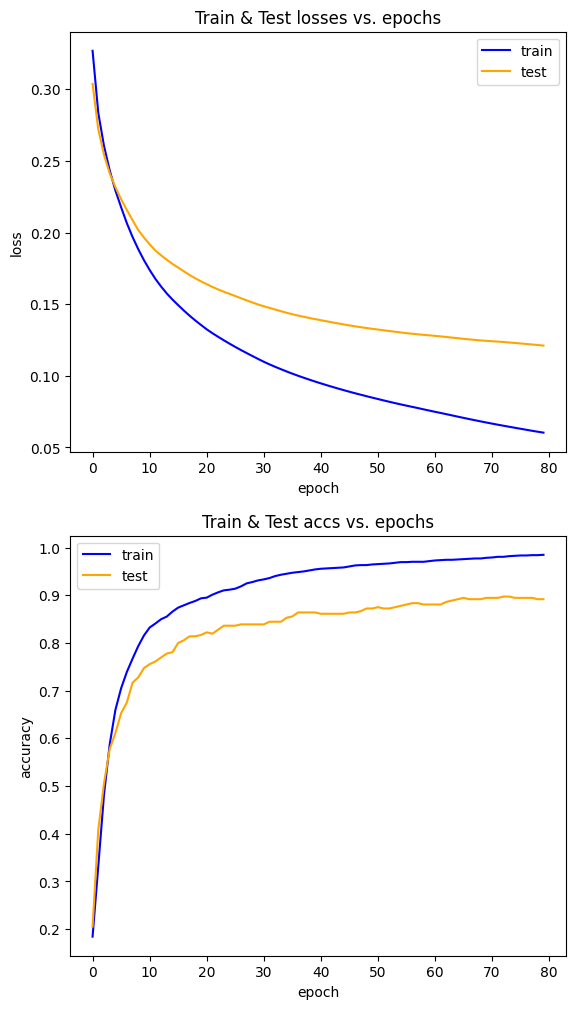

In [ ]:
fig,(ax1,ax2)=plt.subplots(2,1)
fig.set_figheight(12)

ax1.plot(train_losses,c="blue")
ax1.plot(test_losses,c="orange")
ax1.set_title("Train & Test losses vs. epochs")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend(['train','test'])

ax2.plot(train_accs,c="blue")
ax2.plot(test_accs,c="orange")
ax2.set_title("Train & Test accs vs. epochs")
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend(['train','test'])

In [ ]:
import cv2

image = cv2.imread("test3.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = image.reshape(1,64)

x = image
# forward

y_pred = model.predict(x)

print(y_pred)
print(np.argmax(y_pred))

[array([[1.54975193e-01, 5.94269559e-03, 7.06692050e-01, 3.37692254e-02,
        6.12271335e-02, 3.04118821e-03, 5.93221352e-04, 1.29470854e-02,
        6.83535680e-05, 2.07438549e-02]])]
2
